# Initial visualization

Simple initial data visualization.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Render plots in notebook
%matplotlib inline

data_dir = "./extracted"
boot_times_path = "{}/boot_times.csv".format(data_dir)
bandwidth_path = "{}/bandwidth_results.csv".format(data_dir)
jitter_path = "{}/jitter_results.csv".format(data_dir)
fileior_path = "{}/fileio_read_results.csv".format(data_dir)
fileiow_path  ="{}/fileio_write_results.csv".format(data_dir)
cpu_path = "{}/cpu_results.csv".format(data_dir)
http_path = "{}/http_benchmark_results.csv".format(data_dir)
pipeline_path = "{}/pipeline_results.csv".format(data_dir)
database_path = "{}/database_results.csv".format(data_dir)


## Boot times

Mean boot times per platform.

Text(0, 0.5, 'Seconds')

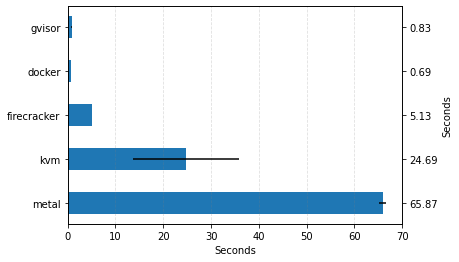

In [46]:
df = pd.read_csv(boot_times_path)
df_mean = df.mean()
df_std = df.std()

fig, ax = plt.subplots()
pos = np.arange(len(df_mean))
rects = ax.barh(pos, df_mean,
    align="center",
    height=0.5,
    tick_label=df_mean.index,
    xerr=df_std)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Seconds")
# For right-hand side yaxis ticks and labels
axr = ax.twinx()
axr.set_ylim(ax.get_ylim())
axr.set_yticks(pos)
axr.set_yticklabels(["{:.2f}".format(val) for val in df_mean])
axr.set_ylabel("Seconds")
# for rect in rects:
#     width = float(rect.get_width())
#     if width < 30:
#         xloc = 5
#         clr = "black"
#         align = "left"
#     else:
#         xloc = -5
#         clr = "white"
#         align = "right"
#     yloc = rect.get_y() + rect.get_height() / 2
#     label = ax.annotate(
#         "{:.2f}".format(width),
#         xy=(width, yloc),
#         xytext=(xloc, 0),
#         textcoords="offset points",
#         horizontalalignment=align,
#         verticalalignment="center",
#         color=clr,
#         weight="bold",
#         clip_on=True
#     )


## Bandwidth and jitter

Mean network bandwidth and jitter.

### Bandwidth

Bandwidth bit / second and CPU usage percentage with TCP traffic.

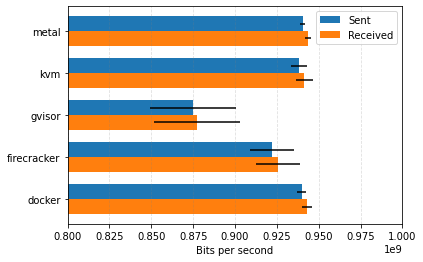

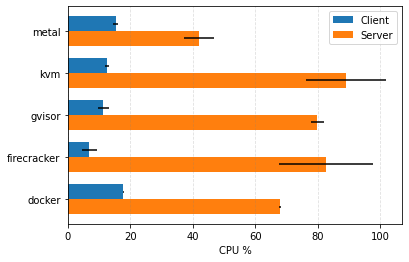

In [66]:
df = pd.read_csv(bandwidth_path)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Send and received bps
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos + height / 2, group_mean["sent_bps"],
    align="center",
    height=height,
    xerr=group_std["sent_bps"],
    label="Sent")
rects2 = ax.barh(pos - height / 2, group_mean["received_bps"],
    align="center",
    height=height,
    xerr=group_std["received_bps"],
    label="Received")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Bits per second")
ax.set_xlim(800_000_000, 1_000_000_000)
ax.legend()

# CPU
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos + height / 2, group_mean["cpu_client"],
    align="center",
    height=height,
    xerr=group_std["cpu_client"],
    label="Client")
rects2 = ax.barh(pos - height / 2, group_mean["cpu_server"],
    align="center",
    height=height,
    xerr=group_std["cpu_server"],
    label="Server")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("CPU %")
ax.legend()




### Jitter

Network jitter with UDP traffic.

Text(0.5, 0, 'Jitter (ms)')

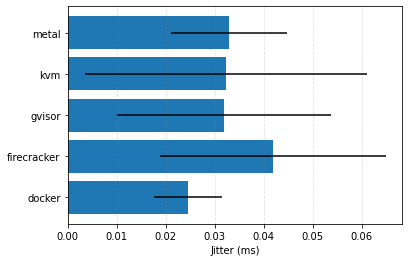

In [68]:
df = pd.read_csv(jitter_path)

group_mean = df.groupby(["platform"]).mean()
group_std = df.groupby(["platform"]).std()

pos = np.arange(len(group_mean))
# Height of the bars
height = 0.35

# Jitter
fig, ax = plt.subplots()
pos = np.arange(len(group_mean))
rects1 = ax.barh(pos, group_mean["jitter_ms"],
    align="center",
    xerr=group_std["jitter_ms"],
    label="Sent")
ax.set_yticks(pos)
ax.set_yticklabels(group_mean.index)
ax.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=.25)
ax.set_xlabel("Jitter (ms)")


# group.plot.bar(y=["jitter_ms"])
# ax = group.plot.bar(y=["bps"])
# ax.set_ylabel("Bits per second")
# ax = group.plot.bar(y=["cpu_client", "cpu_server"])
# ax.set_ylabel("CPU (%)")

## File I/O

Filesystem I/O read and write results (bytes per second).

Text(0, 0.5, 'File read MiB/s')

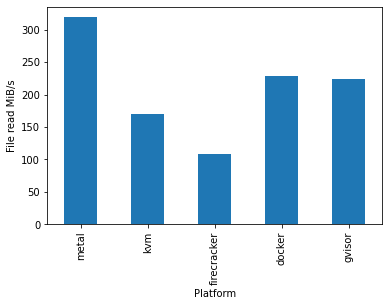

In [5]:
df = pd.read_csv(fileior_path)

ax = df.mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("File read MiB/s")


Text(0, 0.5, 'File write MiB/s')

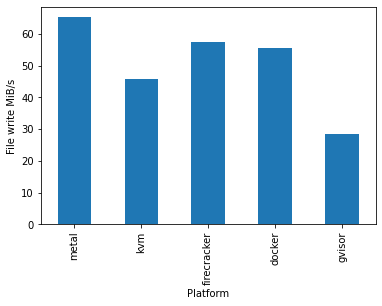

In [6]:
df = pd.read_csv(fileiow_path)

ax = df.mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("File write MiB/s")


## CPU

Mean CPU `sysbench` events / second per platform.

Text(0, 0.5, 'Events per second')

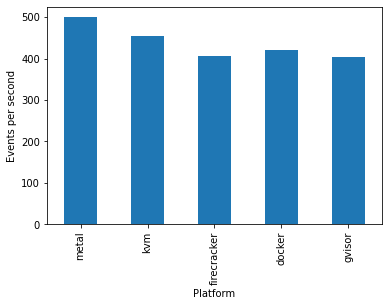

In [7]:
df = pd.read_csv(cpu_path)
ax = df.mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("Events per second")


## HTTP Benchmark

HTTP benchmark results.

Text(0, 0.5, 'Mean time per request (ms)')

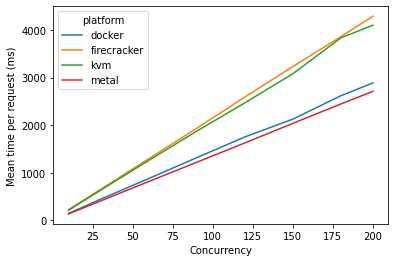

In [8]:
df = pd.read_csv(http_path)
ax = df.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="mean_time_per_req").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Mean time per request (ms)")


Text(0, 0.5, 'Requests per second')

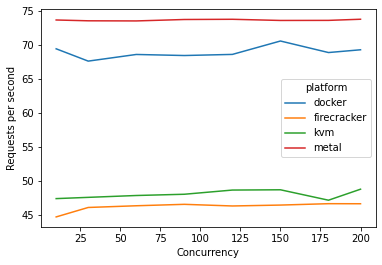

In [9]:
df = pd.read_csv(http_path)
ax = df.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="req_per_sec").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Requests per second")


## Pipeline results

Build pipeline results.

Text(0, 0.5, 'Time (seconds)')

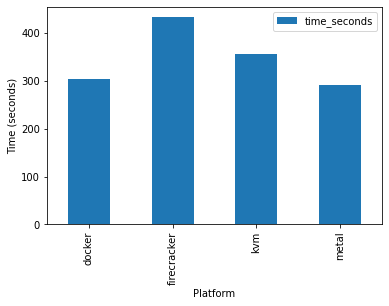

In [10]:
df = pd.read_csv(pipeline_path)

ax = df.groupby(["platform"]).mean().plot.bar()
ax.set_xlabel("Platform")
ax.set_ylabel("Time (seconds)")

## Database

Database performance results.

Text(0, 0.5, 'Transactions per second')

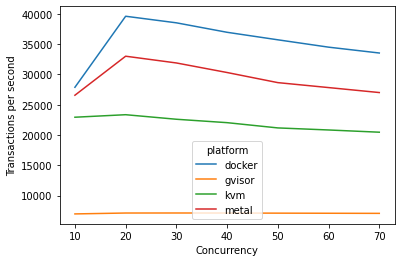

In [11]:
df = pd.read_csv(database_path)

read_only = df[df.write_queries.eq(0)]

ax = read_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="transactions").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")


Text(0, 0.5, 'Transactions per second')

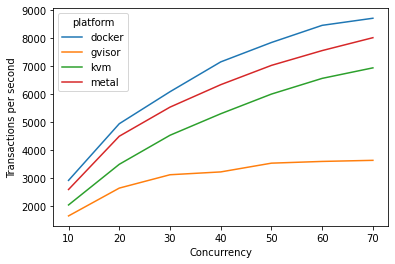

In [12]:
write_only = df[df.read_queries.eq(0)]
ax = write_only.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="transactions").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")


Text(0, 0.5, 'Transactions per second')

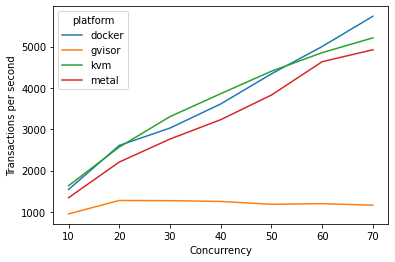

In [13]:
read_write = df[df.write_queries.ne(0) & df.read_queries.ne(0)]

ax = read_write.groupby(["platform", "concurrency"]).mean().reset_index().pivot(index="concurrency", columns="platform", values="transactions").plot()
ax.set_xlabel("Concurrency")
ax.set_ylabel("Transactions per second")